In [52]:
import torch
from pathlib import Path
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import the training set (first 50,000 imgs) by setting train=True.

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True)

# import the test set (10,000 imgs) by setting train=False

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)




Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
# define the ten labels manually.
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
#first image in our dataset

trainset[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F2D96AAE850>, 6)

this is an image of a frog


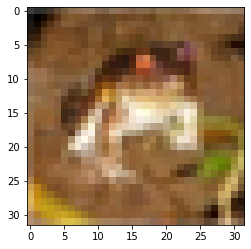

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
example = 0
# index into the 50,000 x 2 trainset vector, and store the label in the variable 'label'. Store the PIL object in variable 'image'.
image, label = trainset[example] #since each element of the trainset list is itself a tuple with the image details, and then the label
# print the label for the image by indexing label into classes.
print("this is an image of a " + classes[(trainset[example])[1]])# first index into tuple in trainset, then the 2nd value (label), and then the classes
plt.imshow(image)
 

In [23]:
#Transforming images into matrices of numbers (tensors).image-to-matrix conversion.
import torchvision.transforms as transforms


In [24]:
datasetT = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [25]:
example = 5
imgTensor, label = datasetT[example]
print('size of image matrix: ' + str(imgTensor.shape))
print("this is an image of a " + classes[(trainset[example])[1]])

size of image matrix: torch.Size([3, 32, 32])
this is an image of a car


In [26]:
print(imgTensor[:, 0:2, 0:2])

tensor([[[0.6235, 0.5882],
         [0.5569, 0.5725]],

        [[0.4000, 0.3569],
         [0.2941, 0.2824]],

        [[0.3961, 0.3725],
         [0.2667, 0.2588]]])


R channel of image 3 in dataset


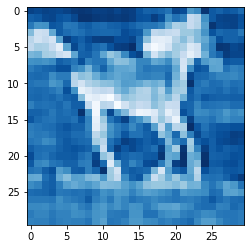

In [45]:
example = 21344
imgTensor, label = datasetT[example]
#plt.imshow(imgTensor[0, 0:32, 0:32], cmap='Reds')
#plt.imshow(imgTensor[1, 1:32, 1:32], cmap='Greens')
plt.imshow(imgTensor[2, 2:32, 2:32], cmap='Blues')
# change the 0 to 1 or 2 for different color channels.
print("R channel of image 3 in dataset")

In [ ]:
#m ---> trainSet
#pCV ---> valData
#mCV ---> validSet

In [47]:
# Split data into train, validation and Test

#length of training examples.
trainSet = 50000 

#percentage of m dedicated to CV.  
valData = 0.2

# give the amount of examples dedicated to CV. 
validSet = int(trainSet*valData)
print("amount of training examples: " + str(trainSet - validSet))
print("amount of validation examples: " + str(validSet))

amount of training examples: 40000
amount of validation examples: 10000


In [53]:
def splitIndices(trainSet, valData):
  """ randomly shuffle a training set's indices, then split the indices into training and cross validation sets.
   Pass in 'm', length of training set, and 'pCV', the percentage of the training set you would like 
   to dedicate to cross validation."""
   
  # determine size of Validation set.
  validSet = int(trainSet*valData)

  #create random permutation of 0 to m-1 - randomly shuffle all values from 0 to m.
  indices = np.random.permutation(trainSet)

  #pick first validSet indices for training, and then validation.
  return indices[validSet:], indices[:validSet]


In [54]:
trainIndices, valIndices = splitIndices(trainSet, valData)

In [55]:
# print the first few indices of the training set, and first few of the validation set, as a sanity check to see that they are shuffled.
print("length of training set: " + str(len(trainIndices)))
print("length of cross validation set: " + str(len(valIndices)))
print()
print('sample validation indices: ' + str(list(valIndices[0:8])))
print('sample educational indices: ' + str(list(trainIndices[0:8])))

length of training set: 40000
length of cross validation set: 10000

sample validation indices: [34825, 699, 30026, 19353, 49648, 16511, 38260, 42276]
sample educational indices: [32822, 36017, 40857, 10517, 1318, 21498, 18624, 30689]


In [56]:
#split up both our training and cross validation sets into batches of 100 training examples each.

from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [58]:
batchSize = 100
trainSampler = SubsetRandomSampler(trainIndices)
trainLoader = DataLoader(datasetT, batchSize, shuffle=True, num_workers=4, pin_memory=True)
valSampler = SubsetRandomSampler(valIndices)
valLoader = DataLoader(datasetT, batchSize*2, num_workers=4, pin_memory=True)
#test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# Logistic Regression

In [59]:
import torch.nn as nn

# this will dictate the rows of the weights matrix
inputSize = 3*32*32

# this will dictate the columns of the weights matrix
numClasses = 10

# create our linear regression model (nn.Linear creates bias terms for us)
model = nn.Linear(inputSize, numClasses)

In [60]:
#This is a lot like linear regression, just with a lot more parameters. Let's see exactly how many parameters we have.

print('dimensions of weight matrix: ' + str(model.weight.shape))
print(model.weight)

dimensions of weight matrix: torch.Size([10, 3072])
Parameter containing:
tensor([[ 1.9961e-03,  1.0808e-02,  1.0013e-02,  ...,  1.2162e-02,
         -1.6058e-02,  1.2868e-02],
        [-1.0326e-02, -1.7720e-02, -1.0248e-02,  ..., -1.0262e-02,
          4.1821e-04,  1.9713e-03],
        [-6.9213e-06,  1.3578e-02, -1.2014e-02,  ..., -1.4384e-02,
          1.6307e-02, -5.7091e-03],
        ...,
        [ 1.4869e-02,  1.1274e-02, -8.8895e-03,  ...,  1.5917e-02,
          2.6890e-03,  8.1384e-03],
        [ 8.2858e-03,  1.6242e-02,  4.7578e-03,  ...,  7.5124e-03,
          3.0529e-03,  5.4832e-03],
        [ 3.5686e-03, -1.4058e-02, -5.5727e-03,  ...,  1.6571e-02,
         -8.3528e-04, -1.2112e-02]], requires_grad=True)


In [61]:
print('dimensions of bias matrix: ' + str(model.bias.shape))
print(model.bias)

dimensions of bias matrix: torch.Size([10])
Parameter containing:
tensor([ 0.0159,  0.0122, -0.0107, -0.0166, -0.0039,  0.0154, -0.0069,  0.0015,
        -0.0109, -0.0111], requires_grad=True)


In [63]:
#Now let's take the first 100 images from the dataset, and pass it into our model.

#for images, labels in trainLoader: 
  # print(labels)
   #print(images.shape)
   #outputs = model(images)
   #break

In [64]:
# Reshape:

class CIFAR10(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(inputSize, numClasses)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 3072)
        out = self.linear(xb)
        return out
    
model = CIFAR10()

In [65]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 3072])
torch.Size([10])


In [66]:
for images, labels in trainLoader:
  outputs = model(images)
  break

print('outputs.shape :', outputs.shape)
print('sample outputs :\n', outputs[:2]) # print 2 out of the 100 rows of the total output vector

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


outputs.shape : torch.Size([100, 10])
sample outputs :
 tensor([[-0.3799, -0.0401,  0.1539,  0.2449, -0.2857,  0.4590, -0.1393,  0.3124,
          0.3930,  0.3582],
        [-0.2289, -0.0489, -0.0436, -0.0006, -0.2450,  0.1861, -0.0146,  0.2215,
          0.1922,  0.0323]], grad_fn=<SliceBackward>)


In [67]:
# Softmax
import torch.nn.functional as F

In [68]:
#We need to specify what dimension we want softmax to be applied upon.

# apply the softmax for each output row in our 100 x 10 output (with batch size 100)
probs = F.softmax(outputs, dim=1)

# look at some sample probabilities
print("sample probabilities:\n", probs[:2].data)
# add up the probabilities of each row for a sanity check that they equal 1 now
print(sum(list(probs[0])))

sample probabilities:
 tensor([[0.0591, 0.0830, 0.1008, 0.1104, 0.0649, 0.1368, 0.0752, 0.1181, 0.1280,
         0.1237],
        [0.0782, 0.0936, 0.0941, 0.0983, 0.0770, 0.1184, 0.0969, 0.1227, 0.1192,
         0.1016]])
tensor(1.0000, grad_fn=<AddBackward0>)


Now, we can find the maximum value in each row to find the largest percentage, and thus, the prediction of the algorithm.
We can see that when our paramaters are randomized, our algorithm is partial to guessing 6 (frog). Let's compare this predictions vector with our actual labels to calculate accuracy.

In [69]:
maxProbs, preds = torch.max(probs, dim=1) #torch.max returns the max value itself (maxProbs) as well as the index of the prediction (preds)
print(preds)
print(maxProbs)

tensor([5, 7, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 7, 8, 5, 8, 5, 8, 8, 8, 3, 8, 7, 7,
        3, 5, 7, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 9, 7, 5, 8, 5, 5, 5, 8, 5, 7,
        5, 7, 8, 5, 7, 5, 8, 5, 8, 8, 8, 7, 3, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8,
        8, 8, 8, 7, 8, 8, 8, 9, 7, 5, 5, 8, 8, 8, 8, 8, 8, 8, 8, 7, 5, 8, 8, 8,
        8, 8, 8, 8])
tensor([0.1368, 0.1227, 0.1463, 0.1493, 0.1437, 0.1387, 0.1351, 0.1276, 0.1452,
        0.1411, 0.1659, 0.1654, 0.1650, 0.1360, 0.1429, 0.1260, 0.1460, 0.1381,
        0.1406, 0.1247, 0.1385, 0.1554, 0.1470, 0.1271, 0.1355, 0.1344, 0.1631,
        0.1319, 0.1312, 0.1356, 0.1635, 0.1646, 0.1433, 0.1620, 0.1536, 0.1352,
        0.1299, 0.1597, 0.1236, 0.1781, 0.1210, 0.1422, 0.1389, 0.1438, 0.1190,
        0.1304, 0.1590, 0.1401, 0.1608, 0.1374, 0.1350, 0.1315, 0.1659, 0.1443,
        0.1287, 0.1281, 0.1639, 0.1440, 0.1574, 0.1447, 0.1397, 0.1679, 0.1955,
        0.1383, 0.1583, 0.1263, 0.1358, 0.1530, 0.1279, 0.1469, 0.1410, 0.1478,
        0.1482, 0.1

In [70]:
#evaluation and accuracy

labels==preds

tensor([False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False,  True, False, False, False, False, False, False,
        False,  True, False, False, False, False,  True, False, False, False,
        False,  True, False, False, False, False, False,  True, False, False,
        False,  True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False, False])

In [71]:
#Create a function that adds up all the correct predictions and divides it by the total length of the labels.

def accuracy(preds, labels):
  return torch.sum(labels==preds).item() / len(labels)

In [72]:
accuracy(preds, labels)

0.11

Cross entropy is a differentiable, continuous function that can be minimized and tracked well. The cross_entropy function in pytorch also executes the softmax function as well.

In [73]:
lossFn = F.cross_entropy

In [74]:
loss = lossFn(outputs, labels)
print(loss)

tensor(2.3430, grad_fn=<NllLossBackward>)


Optimization using SDG

In [75]:
learningRate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [76]:
# Training the model

def lossBatch(model, lossFn, xb, yb, opt=None, metric=None):
  # calculate the loss
  preds = model(xb)
  loss = lossFn(preds, yb)

  if opt is not None:
    # compute gradients
    loss.backward()
    # update parameters
    opt.step()
    # reset gradients to 0 (don't want to calculate second derivatives!)
    opt.zero_grad()

  metricResult = None
  if metric is not None:
    metricResult = metric(preds, yb)

  return loss.item(), len(xb),  metricResult

In [78]:
#define a function that computes and evaluates the total cost on the validation set.

def evaluate(model, lossFn, validDL, metric=None):
  #with torch.no_grad (this was causing an error)
  
  # pass each batch of the validation set through the model to form a multidimensional list (holding loss, length and metric for each batch)
  # the reason why we made optimization optional is so we can reuse the function here
  results = [lossBatch(model, lossFn, xb, yb, metric=metric,) for xb,yb in validDL]

  # separate losses, counts and metrics
  losses, nums, metrics = zip(*results)

  # total size of the dataset (we keep track of lengths of batches since dataset might not be perfectly divisible by batch size)
  total = np.sum(nums)

  # find average total loss over all batches in validation (remember these are all vectors doing element wise operations.)
  avgLoss = np.sum(np.multiply(losses, nums))/total

  # if there is a metric passed, compute the average metric
  if metric is not None:
    # avg of metric accross batches
    avgMetric = np.sum(np.multiply(metrics, nums)) / total

  return avgLoss, total, avgMetric

In [79]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1) # underscore discards the max value itself, we don't care about that
  return torch.sum(preds == labels).item() / len(preds)

In [80]:
E = evaluate(model, lossFn, valLoader, metric=accuracy)

print("training set loss: ", loss)
print("cross validation set loss: ", E[0])

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


training set loss:  tensor(2.3430, grad_fn=<NllLossBackward>)
cross validation set loss:  2.323052903175354


In [81]:
def fit(epochs, model, lossFn, opt, trainDL, valDL, metric=None):
  valList = [0.10]
  for epoch in range(epochs):
    # training - perform one step gradient descent on each batch, then moves on
    for xb, yb in trainDL: 
      loss,_,lossMetric = lossBatch(model, lossFn, xb, yb, opt)
      

    # evaluation on cross val dataset - after updating over all batches, technically one epoch
    # evaluates over all validation batches and then calculates average val loss, as well as the metric (accuracy)
    valResult = evaluate(model, lossFn, valDL, metric)
    valLoss, total, valMetric = valResult
    valList.append(valMetric)
    # print progress
    if metric is None: 
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, epochs, valLoss))
    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch + 1, epochs, valLoss, metric.__name__, valMetric))

  return valList

In [82]:
# redefine model and optimizer
learningRate = 0.009
model = CIFAR10()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [85]:
trainList = fit(100, model, lossFn, optimizer, trainLoader, valLoader, metric=accuracy)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [1/100], Loss: 1.7271, accuracy: 0.4081
Epoch [2/100], Loss: 1.7214, accuracy: 0.4054
Epoch [3/100], Loss: 1.7128, accuracy: 0.4167
Epoch [4/100], Loss: 1.7069, accuracy: 0.4146
Epoch [5/100], Loss: 1.7089, accuracy: 0.4167
Epoch [6/100], Loss: 1.6922, accuracy: 0.4239
Epoch [7/100], Loss: 1.7007, accuracy: 0.4160
Epoch [8/100], Loss: 1.6990, accuracy: 0.4164
Epoch [9/100], Loss: 1.7253, accuracy: 0.4027
Epoch [10/100], Loss: 1.6947, accuracy: 0.4235
Epoch [11/100], Loss: 1.6877, accuracy: 0.4288
Epoch [12/100], Loss: 1.6955, accuracy: 0.4188
Epoch [13/100], Loss: 1.6940, accuracy: 0.4180
Epoch [14/100], Loss: 1.6931, accuracy: 0.4232
Epoch [15/100], Loss: 1.6812, accuracy: 0.4297
Epoch [16/100], Loss: 1.6994, accuracy: 0.4138
Epoch [17/100], Loss: 1.6871, accuracy: 0.4253
Epoch [18/100], Loss: 1.6878, accuracy: 0.4249
Epoch [19/100], Loss: 1.6850, accuracy: 0.4201
Epoch [20/100], Loss: 1.6858, accuracy: 0.4201
Epoch [21/100], Loss: 1.6755, accuracy: 0.4321
Epoch [22/100], Loss: 

Text(0.5, 1.0, 'accuracy vs number of epochs')

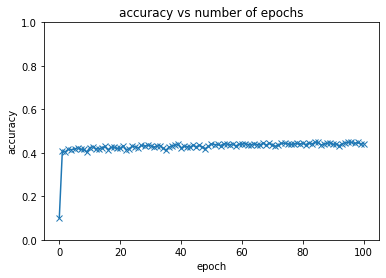

In [87]:
plt.plot(trainList, '-x')
axes = plt.gca() #gca means get current axes
axes.set_ylim([0,1])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy vs number of epochs')

In [88]:
test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())

Files already downloaded and verified


In [89]:
testLoader = DataLoader(test, batchSize)

In [90]:
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, testLoader, metric=accuracy)
print("test set accuracy: \n", avgMetric)
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, valLoader, metric=accuracy)
print("cross validation set accuracy: \n",avgMetric)
avgLoss, total, avgMetric = evaluate(model, F.cross_entropy, trainLoader, metric=accuracy)
print("training set accuracy: \n",avgMetric)

test set accuracy: 
 0.4016


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


cross validation set accuracy: 
 0.44264
training set accuracy: 
 0.44264
